# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 2: Image Classification with CNNs (50%)

In this task, you'll dive into the world of Convolutional Neural Networks (CNNs) by working with the CIFAR-10 dataset, a staple in image classification challenges. Your goal is to build and evaluate two different CNN models to classify images into one of the ten categories accurately.

The dataset is availabel in pytorch and keras.

## Part 1: Custom CNN Model (20%)

- Design and train a CNN model from scratch tailored for the CIFAR-10 dataset.
- Focus on the architecture that you believe will perform best for this specific task.
- Integrate various techniques such as batch normalization, dropout, learning rate schedulers, and early stopping to improve model training. Experiment with these methods and finetune them to see how they affect training stability, convergence speed, and overall performance.

## Part 2: Transfer Learning Model (20%)

- Implement a transfer learning approach using a pre-trained model of your choice.
- Fine-tune the model on the CIFAR-10 dataset to achieve the best possible performance.

## Evaluation (10%)

Ensure that both models are robust and generalized well to unseen data.

After training both models, you will evaluate them on a provided test dataset.

Compare your models based on:
- **AUC-ROC**: How well does each model discriminate between classes?
- **Model Size**: Consider the trade-offs in model complexity.
- **Inference Speed**: Evaluate how quickly your model can predict classes for new images.

Reflect on the performance, size, and inference speed of both models. What insights can you draw from these comparisons?

### Learning Objectives

- Understand and apply CNNs for image classification.
- Explore the impact of model architecture on performance and efficiency.
- Learn the process and benefits of transfer learning in deep learning.

Remember, the key to this task is not just about achieving the highest accuracy but also understanding the strengths and limitations of different approaches in machine learning model development.

In [35]:
import torch

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [37]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.CIFAR10(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.CIFAR10(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

Files already downloaded and verified


In [38]:
print(train_data)
print(test_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


Let`s explore the data in CIFAR10 dataset

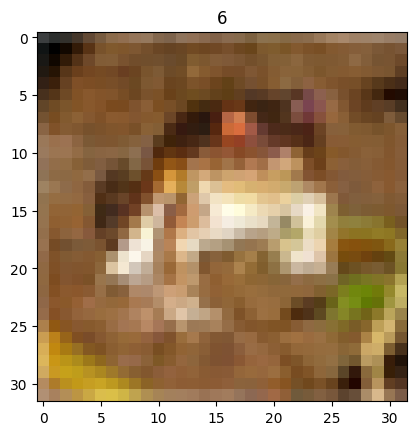

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [39]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()
print(train_data.data[0])

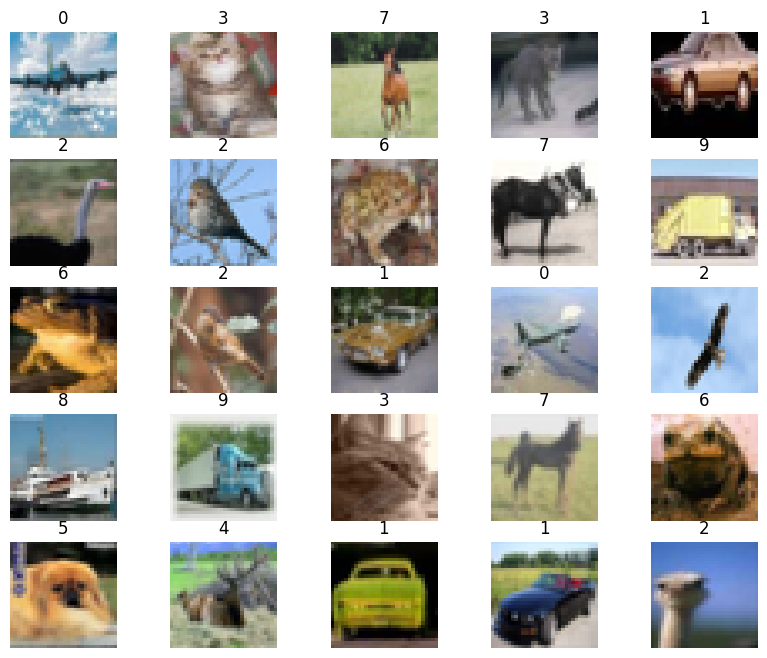

In [40]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data.data[sample_idx], train_data.targets[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

# Part 1
## CIFAR-10 Image Classification using Convolutional Neural Network

Convolutional Neural Network (CNN) model for classifying CIFAR-10 images.

## Importing Libraries
- `numpy` for numerical operations
- `cifar10` from `tensorflow.keras.datasets` for loading the CIFAR-10 dataset
- `Sequential` from `tensorflow.keras.models` for creating the CNN model
- Various layers like `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Dropout`, and `BatchNormalization` from `tensorflow.keras.layers`
- `Adam` optimizer and callbacks like `EarlyStopping` and `ReduceLROnPlateau` from `tensorflow.keras.optimizers` and `tensorflow.keras.callbacks` respectively.
 
The code for this task was inspired by https://www.kaggle.com/code/ektasharma/simple-cifar10-cnn-keras-code-with-88-accuracy

In [41]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


learning_rate = 0.001
batch_size = 128
epochs = 50

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
# Save the model
model.save('SofiaGamershmidt.h5')

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 122ms/step - accuracy: 0.4059 - loss: 1.9494 - val_accuracy: 0.2845 - val_loss: 2.2482 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 128ms/step - accuracy: 0.6342 - loss: 1.0455 - val_accuracy: 0.6796 - val_loss: 0.9052 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 133ms/step - accuracy: 0.6967 - loss: 0.8521 - val_accuracy: 0.7434 - val_loss: 0.7385 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 119ms/step - accuracy: 0.7360 - loss: 0.7490 - val_accuracy: 0.7540 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.7652 - loss: 0.6622 - val_accuracy: 0.7502 - val_loss: 0.7292 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.7861 - loss: 0.6045 - val_accuracy: 0.7638 - val_loss: 0.6877 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.8

Test Accuracy: 0.8310999870300293


## Training a ResNet50 Model on CIFAR-10 Dataset with PyTorch

This code snippet demonstrates training a ResNet50 model on the CIFAR-10 dataset using PyTorch

**Note:** some code parts was taken from lab 9 and lab 10 

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

resnet50 = models.resnet50(pretrained=True)

for param in resnet50.parameters():
    param.requires_grad = False


num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 10) 

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50.fc.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet50.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,   200] loss: 1.460
[1,   400] loss: 0.920
[1,   600] loss: 0.796
[2,   200] loss: 0.702
[2,   400] loss: 0.682
[2,   600] loss: 0.660
[3,   200] loss: 0.635
[3,   400] loss: 0.619
[3,   600] loss: 0.615
[4,   200] loss: 0.598
[4,   400] loss: 0.607
[4,   600] loss: 0.579
[5,   200] loss: 0.585
[5,   400] loss: 0.581
[5,   600] loss: 0.568
[6,   200] loss: 0.565
[6,   400] loss: 0.566
[6,   600] loss: 0.553
[7,   200] loss: 0.550
[7,   400] loss: 0.552
[7,   600] loss: 0.557
[8,   200] loss: 0.558
[8,   400] loss: 0.545
[8,   600] loss: 0.550
[9,   200] loss: 0.540
[9,   400] loss: 0.539
[9,   600] loss: 0.542
[10,   200] loss: 0.540
[10,   400] loss: 0.536
[10,   600] loss: 0.539
Finished Training


In [57]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet50(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on the test set: %d %%' % (100 * correct / total))


Files already downloaded and verified
Files already downloaded and verified
Accuracy on the test set: 81 %


## Evaluation

#### Custom CNN

In [45]:

test_data = np.load('task_2_test_images.npy')
test_labels = np.load('task_2_test_labels.npy')
test_data = test_data.astype('float32') / 255.0

test_labels = test_labels.reshape(-1, 1)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_acc)

312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6591 - loss: 1.3809
Test Accuracy: 0.6524708867073059


#### Fine-tuned resnet50

In [46]:
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),  
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]
        image = Image.fromarray(image) 
        image = self.transform(image)
        return image, label

test_labels = np.load('task_2_test_labels.npy')
numpy_dataset = np.load('task_2_test_images.npy')

test_labels = torch.tensor(test_labels)

custom_dataset = CustomDataset(numpy_dataset, test_labels)

batch_size = 32  
testloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0

resnet50.eval()

with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet50(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on the test set: %d %%' % (100 * correct / total))


Accuracy on the test set: 57 %


In [47]:
from sklearn.metrics import roc_auc_score
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('SofiaGamershmidt.h5')

# Generate predictions
y_prob = model.predict(x_test)

# Compute AUC-ROC for each class
auc_roc_per_class = []
for i in range(10):  # Assuming you have 10 classes for CIFAR-10
    auc = roc_auc_score((y_test == i).astype(int), y_prob[:, i])
    auc_roc_per_class.append(auc)

# Compute micro-average AUC-ROC
micro_auc_roc = roc_auc_score(tf.keras.utils.to_categorical(y_test), y_prob, average='micro')

print("AUC-ROC per class:")
for i in range(10):
    print(f"Class {i}: {auc_roc_per_class[i]:.4f}")

print(f"Micro-average AUC-ROC: {micro_auc_roc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
AUC-ROC per class:
Class 0: 0.9887
Class 1: 0.9964
Class 2: 0.9709
Class 3: 0.9578
Class 4: 0.9837
Class 5: 0.9752
Class 6: 0.9909
Class 7: 0.9909
Class 8: 0.9935
Class 9: 0.9943
Micro-average AUC-ROC: 0.9861


In [48]:
predictions = []
true_labels = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet50(inputs)
        predictions.extend(torch.softmax(outputs, dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

In [52]:
from sklearn.metrics import roc_auc_score
auc_roc_per_class = []
for i in range(10): 
    auc_roc = roc_auc_score((true_labels == i).astype(int), predictions[:, i])
    auc_roc_per_class.append(auc_roc)

for i in range(10):
    print(f"Class {i}: {auc_roc_per_class[i]:.4f}")


Class 0: 0.9279
Class 1: 0.9420
Class 2: 0.8827
Class 3: 0.8811
Class 4: 0.8946
Class 5: 0.9001
Class 6: 0.9172
Class 7: 0.9030
Class 8: 0.9374
Class 9: 0.9405


Based on the provided ROC-AUC parameters, the custom CNN model generally performs better than the fine-tuned ResNet-50 model.

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,180 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 2 (12.00 B)

In [54]:
total_params = sum(p.numel() for p in resnet50.parameters())
print("Total number of parameters:", total_params)


Total number of parameters: 23528522


ResNet-50 typically has significantly more parameters compared to a custom CNN model. ResNet-50, being a deeper and more complex architecture, often has approximately ten times more parameters than a typical custom CNN

When comparing inference speeds, the custom CNN model is likely to perform faster due to its simpler architecture and lower parameter count. 